## Метрики моделей классификации 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from sklearn.datasets import load_iris

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
from sklearn.neighbors import KNeighborsClassifier 

##### Визуал контейнера ###
# from sklearn import set_config
# set_config(display="diagram")


import sklearn
#pip install --upgrade scikit-learn
sklearn.__version__


'1.0.2'

In [2]:

iris=load_iris()


#iris.target = np.where(iris.target==2,0,iris.target)
iris.target = np.where(iris.target<=1,1,0)
iris.target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [3]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=7, 
                                                     test_size=0.5, stratify=iris.target)

kfold = KFold(n_splits=5, shuffle=True, random_state=1)


pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('classifier', KNeighborsClassifier())])

n_neighbors=[1, 2, 3, 4, 8, 12, 16, 20, 22, 24, 26, 30, 34, 38]
p=[1,2,3,10]
weights=['uniform','distance']

param_grid =[
    {'preprocessing': [MinMaxScaler(), StandardScaler(),RobustScaler(),Normalizer()], 
     'classifier': [KNeighborsClassifier()],
     'classifier__n_neighbors': n_neighbors,
     'classifier__p': p,
     'classifier__weights': weights
     }
]

grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid=[{'classifier': [KNeighborsClassifier(n_neighbors=3)],
                          'classifier__n_neighbors': [1, 2, 3, 4, 8, 12, 16, 20,
                                                      22, 24, 26, 30, 34, 38],
                          'classifier__p': [1, 2, 3, 10],
                          'classifier__weights': ['uniform', 'distance'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             return_train_score=True)

In [4]:
gridresults = pd.DataFrame(grid.cv_results_)
display(gridresults.sort_values(["rank_test_score"]).T)

,75,119,79,83,67,91,111,127,43,167,...,410,426,425,433,442,419,443,435,427,434
mean_fit_time,0.000535,0.000574,0.00051,0.000529,0.000512,0.000592,0.000577,0.000587,0.000519,0.000535,...,0.001166,0.0011,0.000577,0.000569,0.001037,0.000513,0.000465,0.000482,0.000467,0.001029
std_fit_time,0.00005,0.000015,0.000002,0.000037,0.000005,0.000044,0.000043,0.000069,0.000004,0.000008,...,0.000062,0.000054,0.000023,0.000053,0.000011,0.000043,0.000012,0.000029,0.000024,0.000018
mean_score_time,0.000821,0.000716,0.000581,0.000876,0.000821,0.001161,0.000657,0.000728,0.000826,0.000618,...,0.000899,0.000813,0.000808,0.000851,0.000879,0.000865,0.000871,0.000911,0.000827,0.000863
std_score_time,0.000003,0.000033,0.000003,0.000002,0.000003,0.000308,0.000052,0.000055,0.000003,0.000011,...,0.000014,0.00003,0.000016,0.000049,0.000046,0.000049,0.000014,0.000087,0.000019,0.000046
param_classifier,KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=3),...,KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=3)
param_classifier__n_neighbors,3,4,3,3,3,3,4,4,2,12,...,34,38,38,38,38,38,38,38,38,38
param_classifier__p,2,3,2,3,1,10,2,10,2,1,...,10,2,2,3,10,1,10,3,2,3
param_classifier__weights,uniform,distance,distance,uniform,uniform,uniform,distance,distance,uniform,distance,...,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform
param_preprocessing,Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),...,RobustScaler(),RobustScaler(),StandardScaler(),StandardScaler(),RobustScaler(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),RobustScaler()
params,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...


In [5]:
# from joblib import Memory
# memory = Memory()

pipe_best = grid.best_estimator_#.set_params(**{'memory': memory})
pipe_best

Pipeline(steps=[('preprocessing', Normalizer()),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [6]:
param = grid.cv_results_['params'][434]
pipe_fail = pipe.set_params(**param)#.set_params(**{'memory': memory})

pipe_fail

Pipeline(steps=[('preprocessing', RobustScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=38, p=3))])

In [7]:
pipe_best.fit(X_train, y_train)
y_best = pipe_best.predict(X_test)

pipe_fail.fit(X_train, y_train)
y_fail = pipe_fail.predict(X_test)

display(pipe_best.score(X_test, y_test))
display(pipe_fail.score(X_test, y_test))

0.9733333333333334

0.84

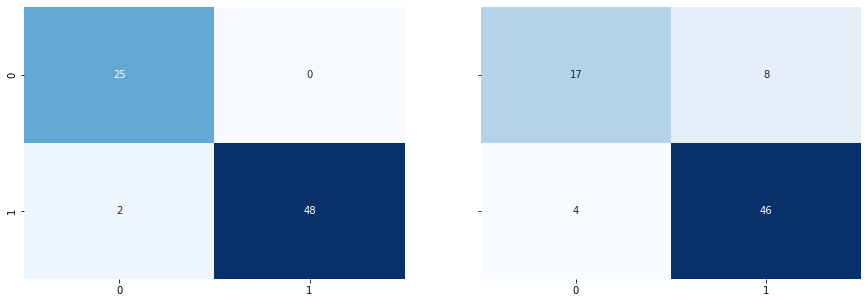

In [8]:
from sklearn.metrics import confusion_matrix

matrix_1=confusion_matrix(y_test,y_best)
matrix_2=confusion_matrix(y_test,y_fail)


fig,ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,5))
ax = plt.subplot(1, 2, 1)
sns.heatmap(matrix_1,annot=True, fmt='g', cbar=None,cmap="Blues");
ax = plt.subplot(1, 2, 2)
sns.heatmap(matrix_2,annot=True, fmt='g', cbar=None,cmap="Blues");


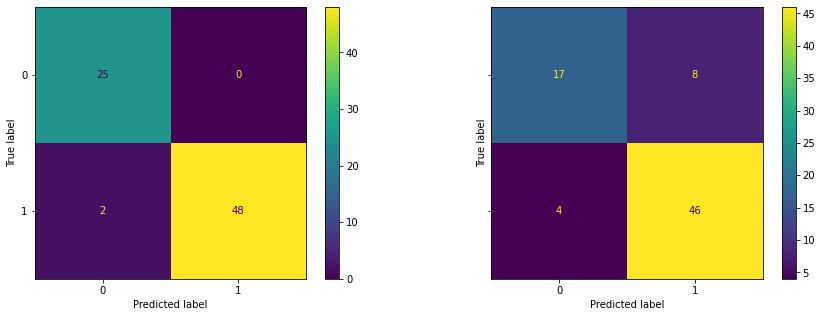

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

fig, [ax1, ax2] = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,5))

ConfusionMatrixDisplay(matrix_1).plot(ax = ax1);
ConfusionMatrixDisplay(matrix_2).plot(ax = ax2);

In [10]:
from sklearn.metrics import f1_score

print ( 'лучшая ', f1_score(y_test, y_best) )
print ( 'худшая ', f1_score(y_test, y_fail) )

лучшая  0.9795918367346939
худшая  0.8846153846153846


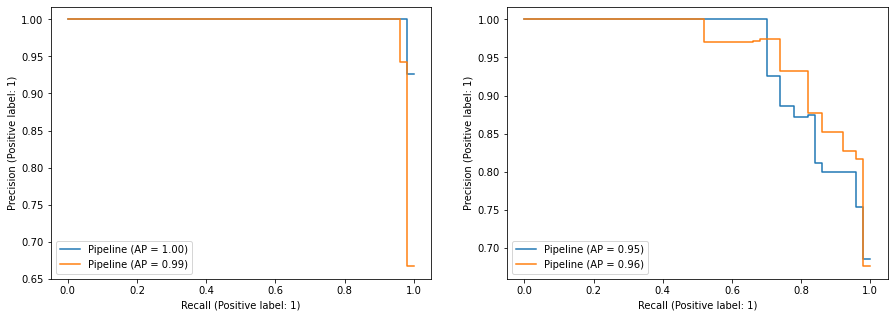

In [11]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 5))

PrecisionRecallDisplay.from_estimator(pipe_best, X_train, y_train,ax = ax1);
PrecisionRecallDisplay.from_estimator(pipe_best, X_test, y_test,ax = ax1);


PrecisionRecallDisplay.from_estimator(pipe_fail, X_train, y_train, ax = ax2);
PrecisionRecallDisplay.from_estimator(pipe_fail, X_test, y_test, ax = ax2);

#### Внимание PrecisionRecallDisplay.from_predictions НЕЛЬЗЯ брать результат команды predict
#### подробнее тут https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_best))
print(classification_report(y_test, y_fail))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.96      0.98        50

    accuracy                           0.97        75
   macro avg       0.96      0.98      0.97        75
weighted avg       0.98      0.97      0.97        75

              precision    recall  f1-score   support

           0       0.81      0.68      0.74        25
           1       0.85      0.92      0.88        50

    accuracy                           0.84        75
   macro avg       0.83      0.80      0.81        75
weighted avg       0.84      0.84      0.84        75



In [13]:
### В зависимости от метода ML, можно узнать с какой вероятностью распределились классы
### регулируюя порог можно улучшить решение 
pipe_fail.predict_proba(X_test)

array([[0.63157895, 0.36842105],
       [0.28947368, 0.71052632],
       [0.28947368, 0.71052632],
       [0.07894737, 0.92105263],
       [0.28947368, 0.71052632],
       [0.02631579, 0.97368421],
       [0.60526316, 0.39473684],
       [0.42105263, 0.57894737],
       [0.55263158, 0.44736842],
       [0.05263158, 0.94736842],
       [0.13157895, 0.86842105],
       [0.42105263, 0.57894737],
       [0.55263158, 0.44736842],
       [0.55263158, 0.44736842],
       [0.44736842, 0.55263158],
       [0.07894737, 0.92105263],
       [0.57894737, 0.42105263],
       [0.42105263, 0.57894737],
       [0.10526316, 0.89473684],
       [0.42105263, 0.57894737],
       [0.52631579, 0.47368421],
       [0.36842105, 0.63157895],
       [0.05263158, 0.94736842],
       [0.5       , 0.5       ],
       [0.05263158, 0.94736842],
       [0.57894737, 0.42105263],
       [0.5       , 0.5       ],
       [0.13157895, 0.86842105],
       [0.42105263, 0.57894737],
       [0.55263158, 0.44736842],
       [0.

thresholds: [0.39473684 0.42105263 0.44736842 0.47368421 0.5        0.52631579
 0.55263158 0.57894737 0.63157895 0.65789474 0.71052632 0.78947368
 0.81578947 0.84210526 0.86842105 0.89473684 0.92105263 0.94736842
 0.97368421]


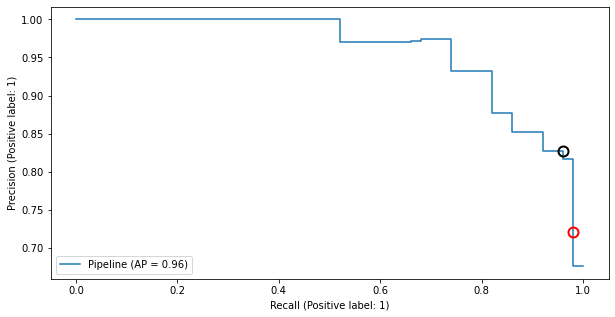

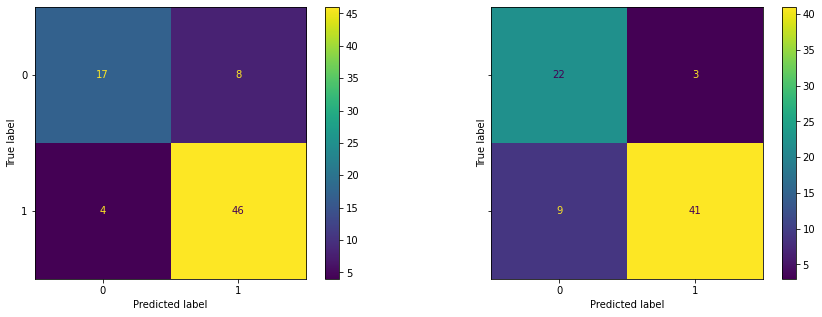

In [28]:
pipe_fail.fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, pipe_fail.predict_proba(X_test)[:,1])
#print('precision :',precision, '   recall: ',recall, '   thresholds:', thresholds)
print('thresholds:', thresholds)

threshold = 0.5
pos = np.searchsorted(thresholds,threshold)
#pos = np.argmin(np.abs(thresholds))

fig = plt.figure(figsize=(10, 5))
ax_mid = fig.add_subplot(111)

PrecisionRecallDisplay.from_estimator(pipe_fail,  X_test, y_test, ax = ax_mid)
ax_mid.plot(recall[pos],precision[pos], 'o', markersize=10,
label="порог 0.5", fillstyle="none", c='k', mew=2)


threshold_new = 0.44
pos = np.searchsorted(thresholds,threshold_new)

ax_mid.plot(recall[pos],precision[pos], 'o', markersize=10,
label="порог 0.5", fillstyle="none", c='r', mew=2)



predicted = pipe_fail.predict_proba(X_test)
x_predicted_ths_50 = (predicted[:,0] < threshold).astype('int')
x_predicted_ths_75 = (predicted[:,0] < threshold_new).astype('int')

matrix_1=confusion_matrix(y_test,x_predicted_ths_50)
matrix_2=confusion_matrix(y_test,x_predicted_ths_75)

fig, [ax1, ax2] = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,5))

ConfusionMatrixDisplay(matrix_1).plot(ax = ax1);
ConfusionMatrixDisplay(matrix_2).plot(ax = ax2);

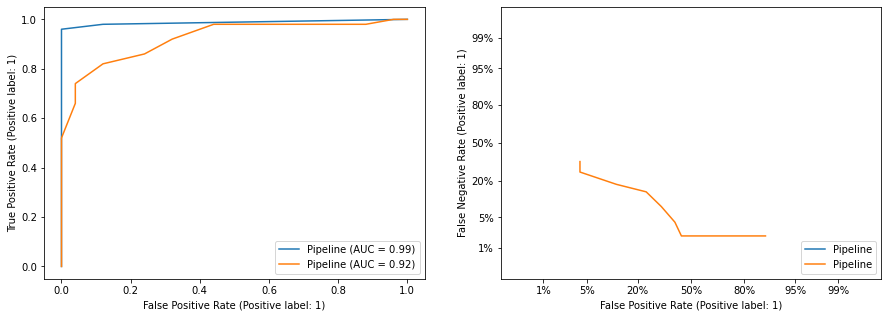

In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import det_curve
from sklearn.metrics import DetCurveDisplay

fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(15, 5))


RocCurveDisplay.from_estimator(pipe_best,X_test, y_test, ax = ax_roc)
DetCurveDisplay.from_estimator(pipe_best,X_test, y_test, ax = ax_det)


RocCurveDisplay.from_estimator(pipe_fail, X_test, y_test, ax = ax_roc)
DetCurveDisplay.from_estimator(pipe_fail,X_test, y_test, ax = ax_det);
